In [2]:
from google.colab import files
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib

%matplotlib inline

uploaded = files.upload()
#d = pd.read_csv('./data.csv')
d = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
d.dtypes

FileNotFoundError: [Errno 2] No such file or directory: './data.csv'

In [ ]:
d.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype=object)

In [ ]:
#get rid of id and Unnamed
d = d.drop(['id', 'Unnamed: 32'], axis=1)
# replace M malignant to 0 (bad), B benign to 1(good)
d.loc[d['diagnosis'] == 'M', 'diagnosis'] = 0.0
d.loc[d['diagnosis'] == 'B', 'diagnosis'] = 1.0
d['diagnosis'] = d['diagnosis'].astype('float64')

In [ ]:
# make sure there is no empty columns
d.isna().sum().sum()

0

In [ ]:
# medians mean
d.median()

diagnosis                    1.000000
radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_

In [ ]:
d.mean()

diagnosis                    0.627417
radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_

In [ ]:
# get min, max, dispersion
dmin = d.min(numeric_only=True)
dmax = d.max(numeric_only=True)
d.std(numeric_only=True)

diagnosis                    0.483918
radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_

/usr/lib64/python3.12/site-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


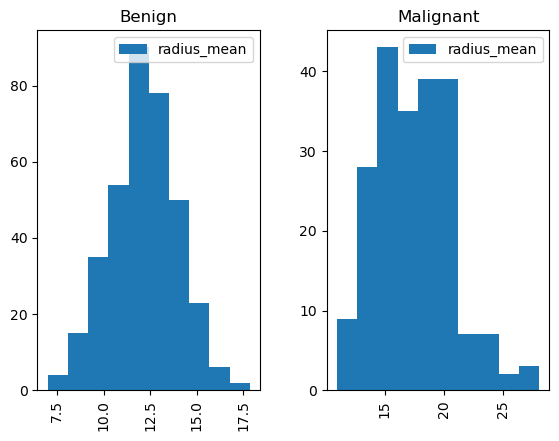

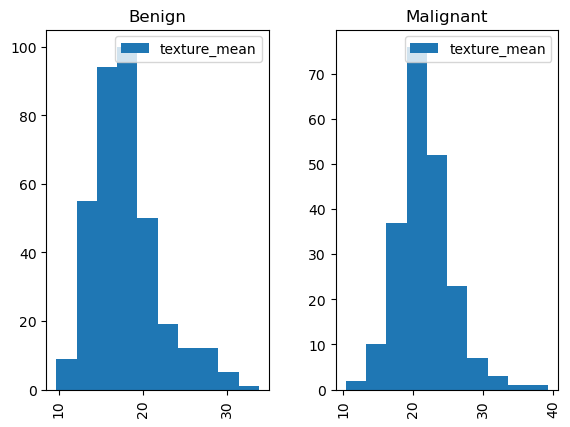

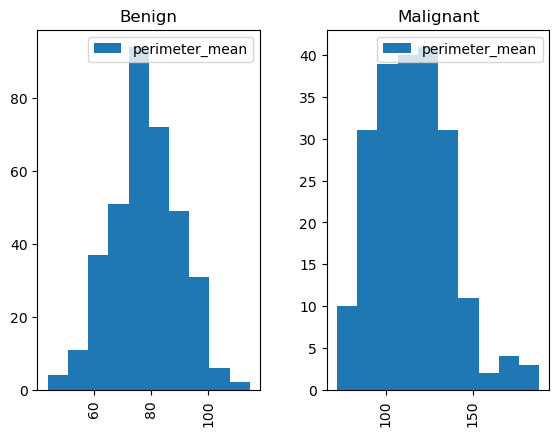

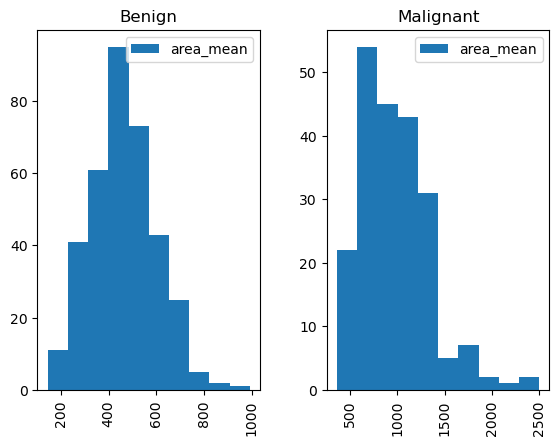

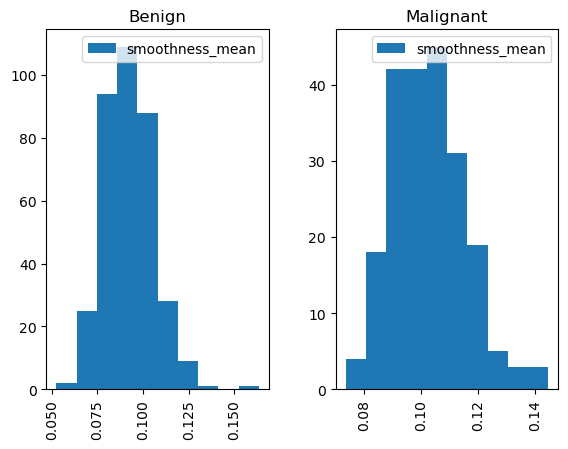

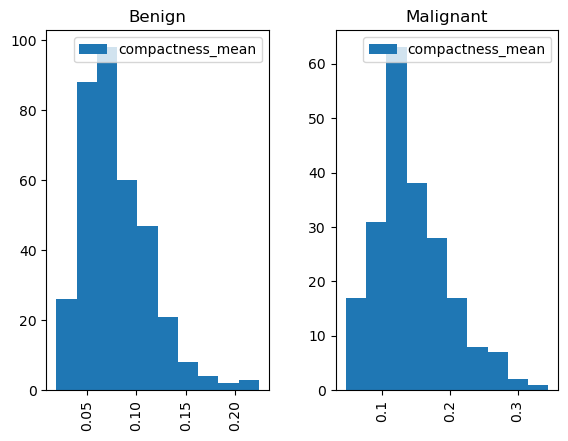

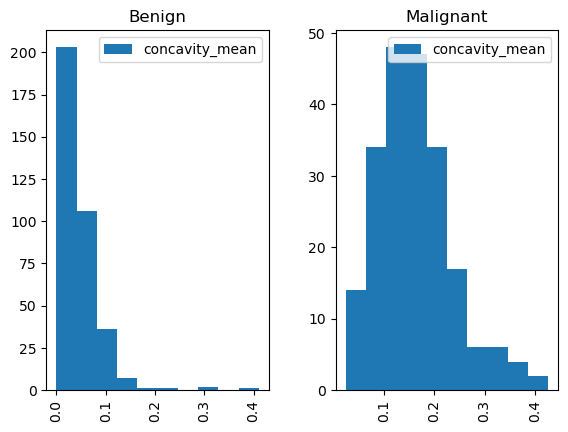

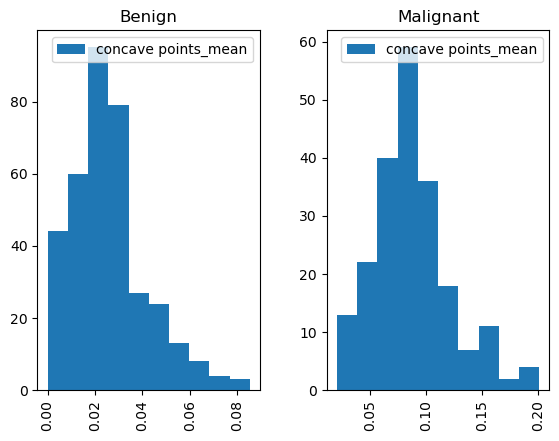

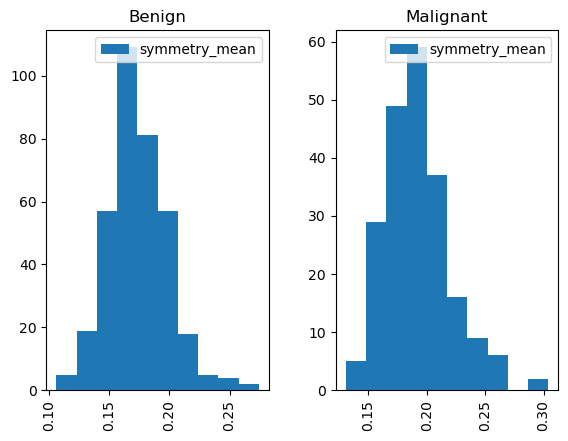

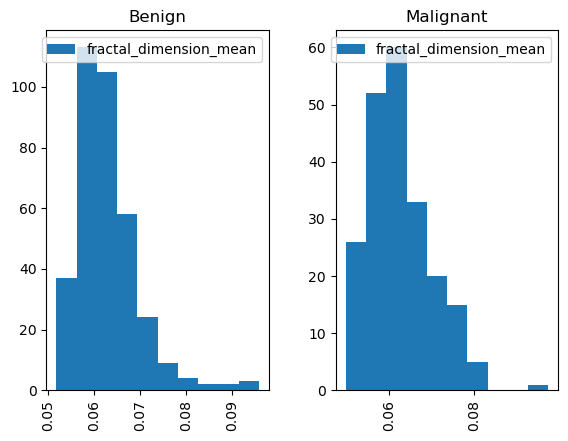

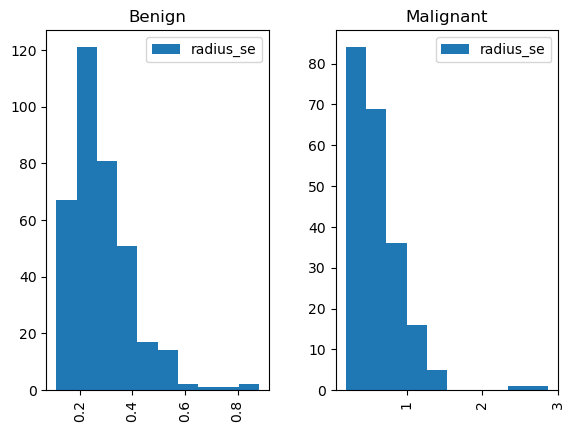

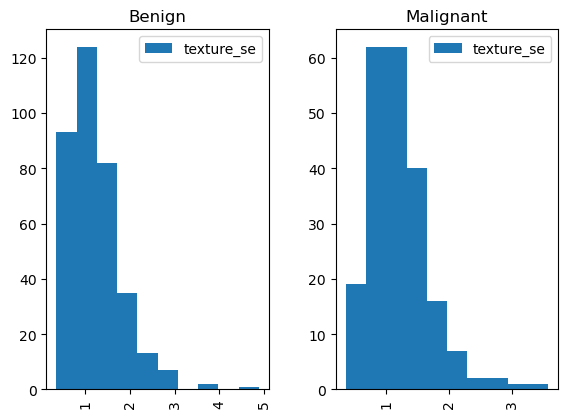

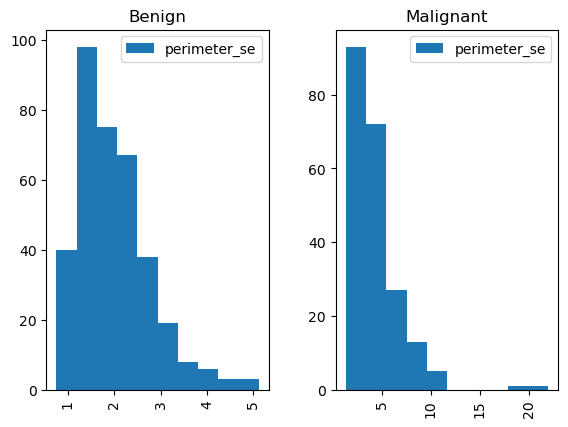

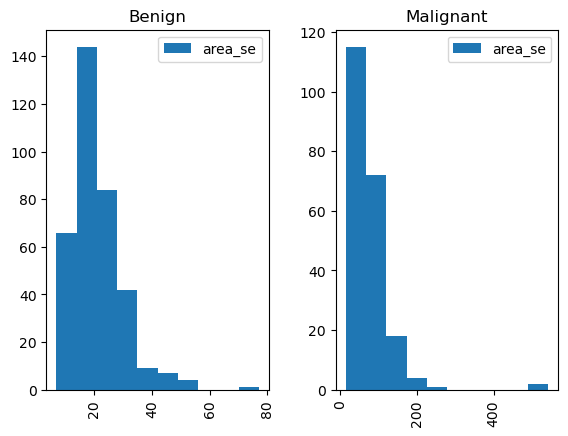

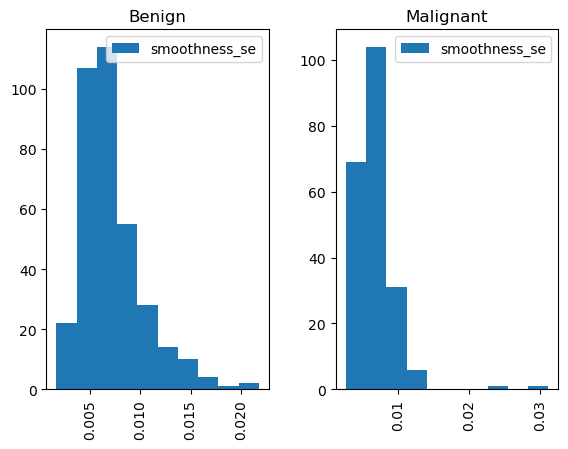

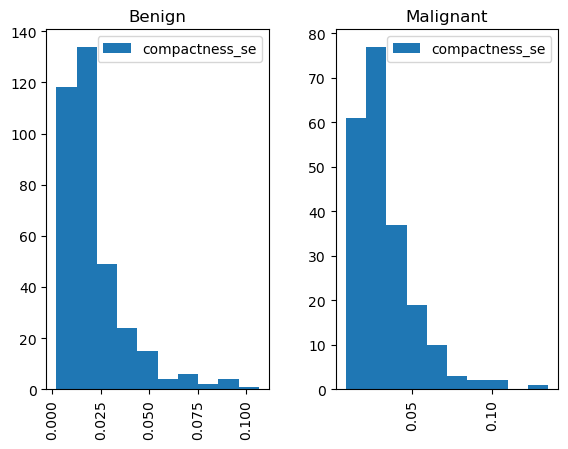

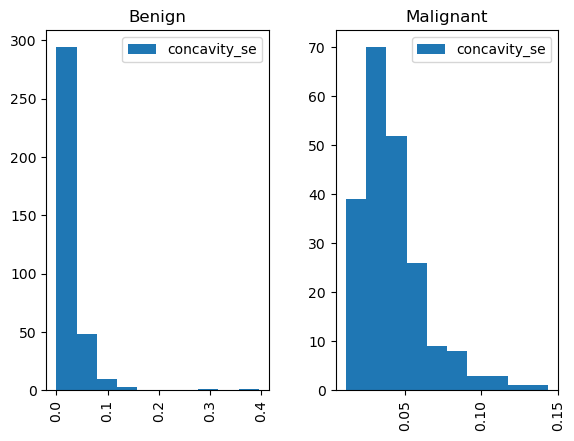

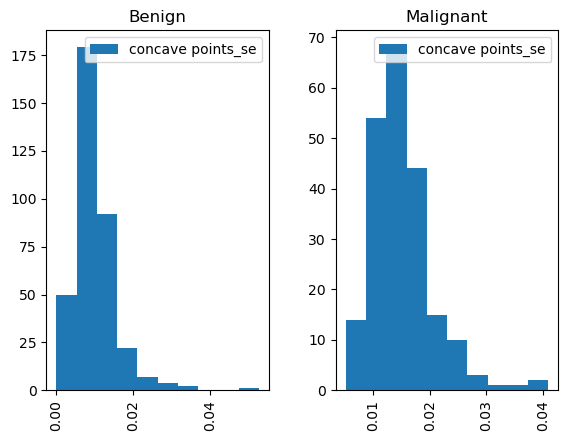

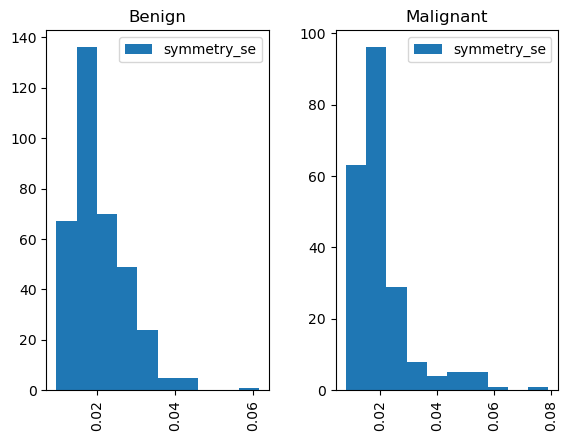

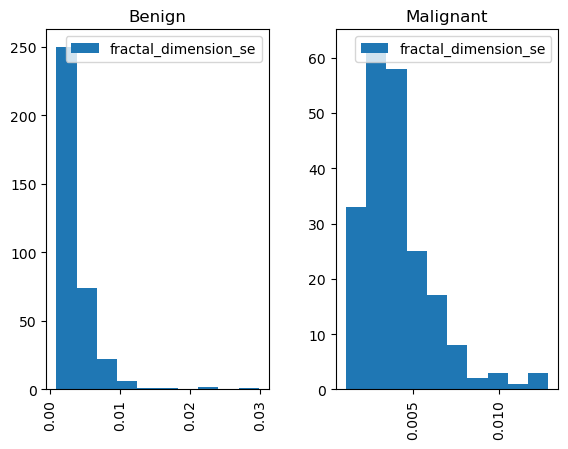

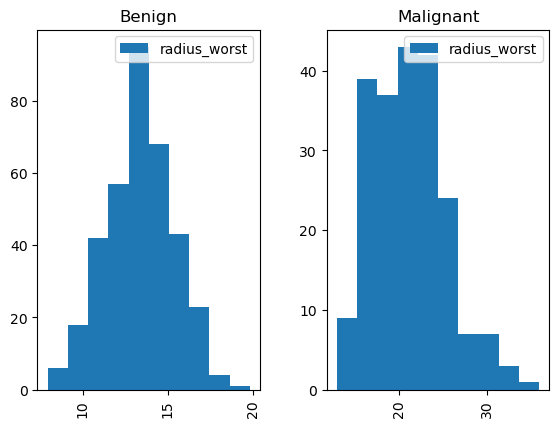

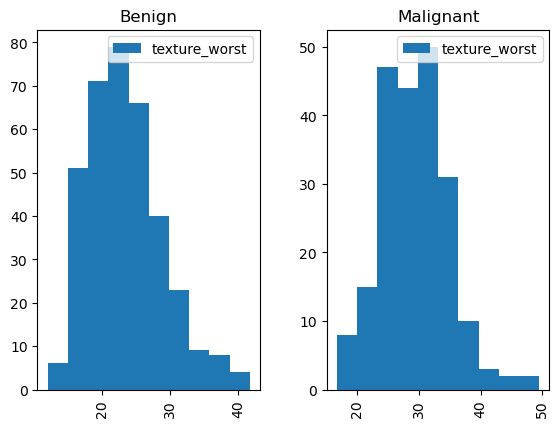

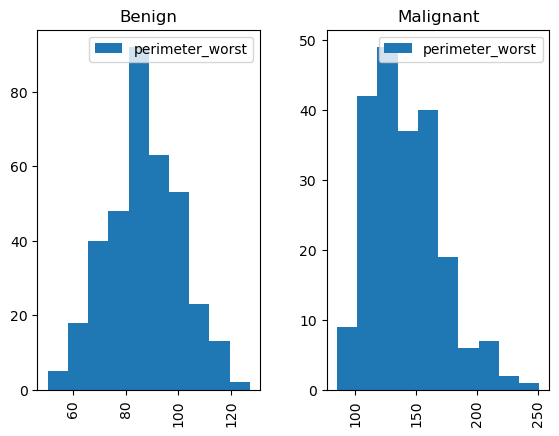

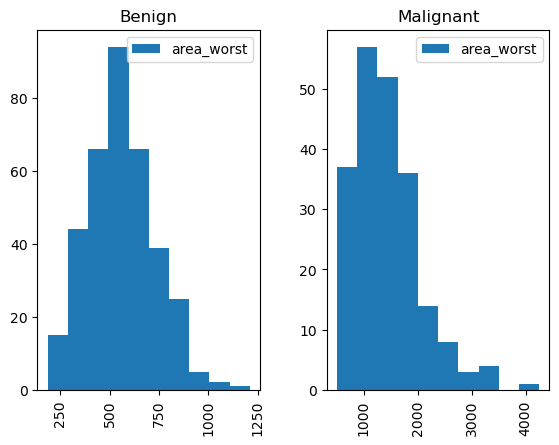

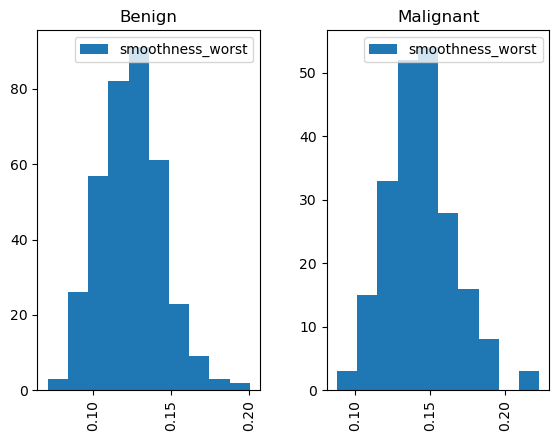

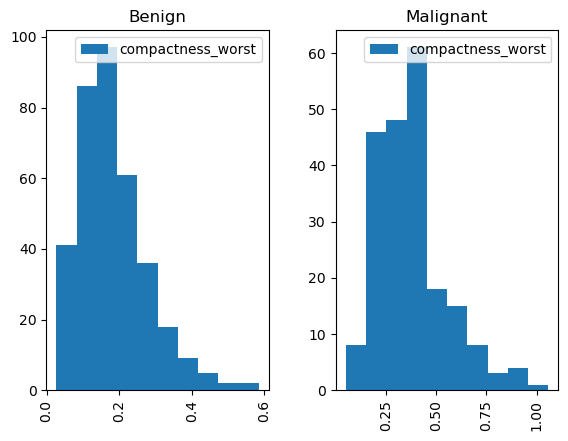

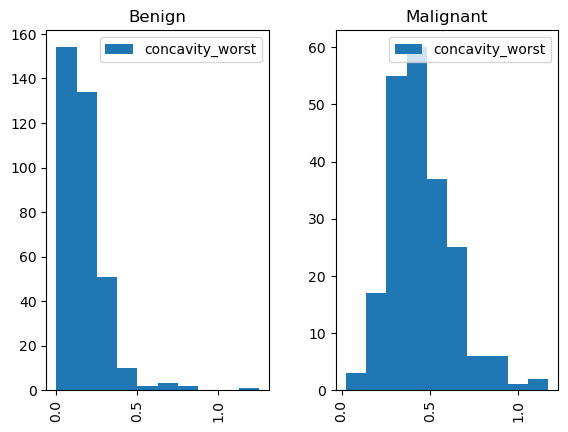

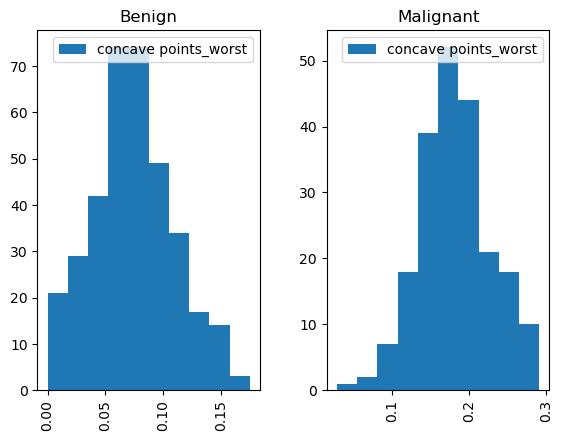

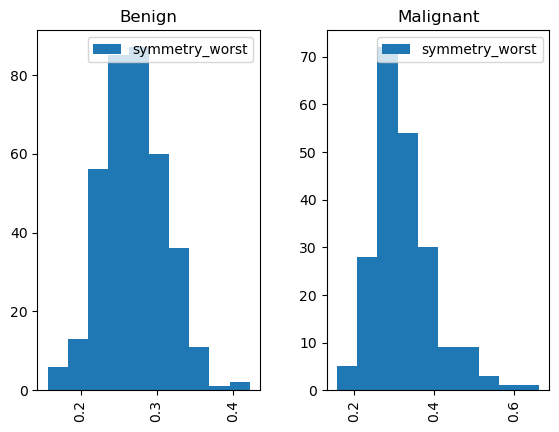

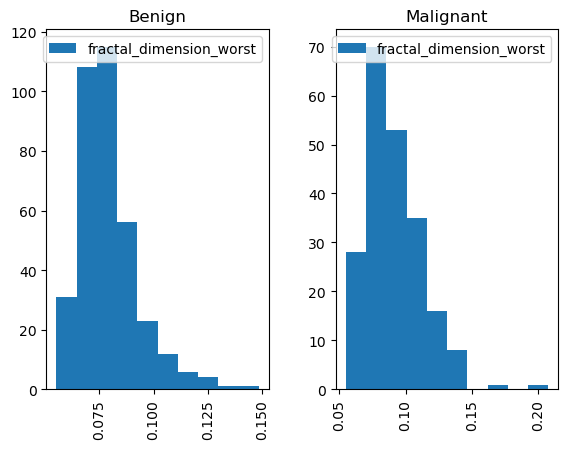

In [ ]:
#d.hist(column='concavity_mean', by='diagnosis')
#d.hist(column='symmetry_mean', by='diagnosis')
# Постройте гистограммы/распределения признаков, при этом используйте целевую
# переменную, чтобы сгруппировать и раскрасить гистограммы.
# meaningful header:
d.loc[d['diagnosis'] == 0.0, 'diagnosis'] = 'Malignant'
d.loc[d['diagnosis'] == 1.0, 'diagnosis'] = 'Benign'

columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for c in columns:
    d.hist(column=c, by='diagnosis', legend = True)

d.loc[d['diagnosis'] == 'Malignant', 'diagnosis'] = 0.0
d.loc[d['diagnosis'] == 'Benign', 'diagnosis'] = 1.0
d['diagnosis'] = d['diagnosis'].astype('float64')

In [ ]:
# Постройте heatmap для матрицы корреляций,
# есть ли признаки, которые сильно скоррелированы? Какие это признаки?
d.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


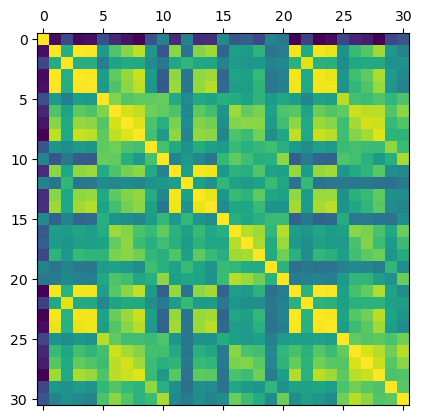

In [ ]:
# сильно коррелируют radius_mean perimeter_mean area_mean radus_worst perimeter_worst area_worst
# это и понятно, это просто геометрические размеры

# коррелируют между собой практически все *_mean - *_worst
# например texture_mean texture_worst - это объяснимо они описывают одно и то же.

# помимо всего прочего видно что самые высокие коефф. корреляции с  целевой функцией имеют признаки
# concave_points_mean ( -0.776614 ) обратная зависимость. т.е. чем меньше concave_points_mean тем более вероятно
# что benign. На гистограмме видно что если concave_points_mean больше 0.09, то скорее всего malignant.
# Нет ни одной benign с concave_points_mean > 0.09 и очень много malignant c concave_points_mean > 0.09
# Еще более информативна
# concave points_worst	-0.793566

import matplotlib.pyplot as plt
plt.matshow(d.corr())
plt.show()
# картинка бесполезна. попробуй угадай что такое feature 23 (вроде 23? а! нет, это 22)
# и он коррелирует с  feature номер 3 (3? а! нет, это 2). Так... а что это?


array([[<Axes: xlabel='perimeter_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='radius_mean', ylabel='perimeter_mean'>],
       [<Axes: xlabel='perimeter_mean', ylabel='radius_mean'>,
        <Axes: xlabel='radius_mean', ylabel='radius_mean'>]], dtype=object)

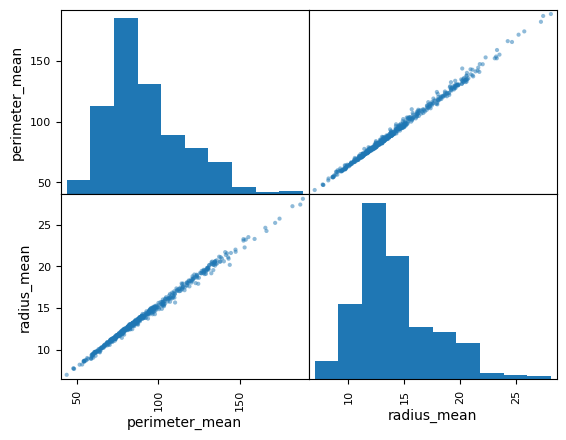

In [ ]:
# Постройте для сильно скоррелированных признаков попарные scatterplot-ы,
# действительно ли наблюдается линейная зависимость?
# видно что для "размерных" признаков зависимость очень линейна.
pd.plotting.scatter_matrix(d[['perimeter_mean', 'radius_mean']])


array([[<Axes: xlabel='concave points_worst', ylabel='concave points_worst'>,
        <Axes: xlabel='diagnosis', ylabel='concave points_worst'>],
       [<Axes: xlabel='concave points_worst', ylabel='diagnosis'>,
        <Axes: xlabel='diagnosis', ylabel='diagnosis'>]], dtype=object)

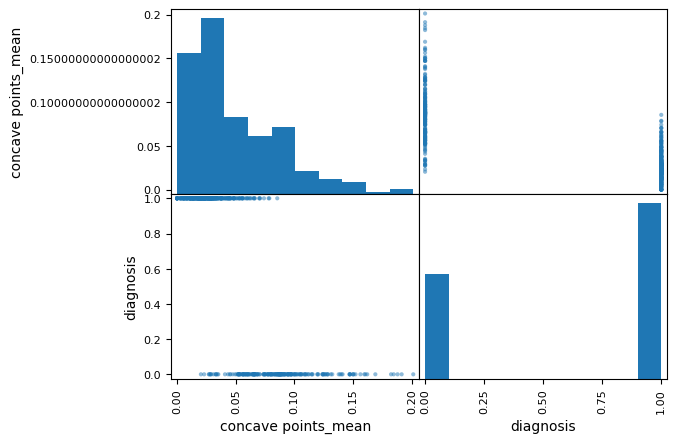

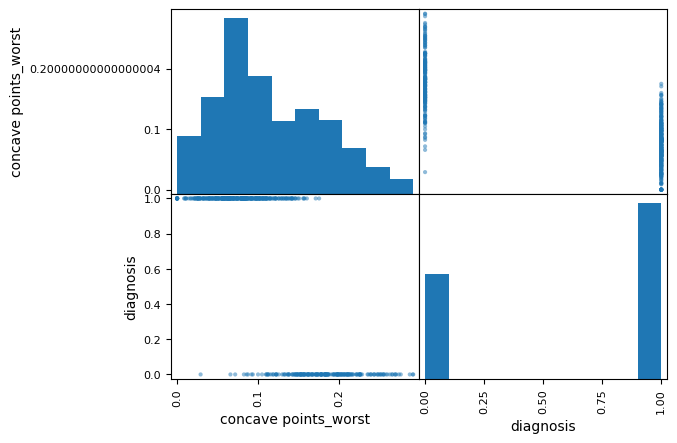

In [ ]:
# но мне больше интересна зависимость 'concave points_mean' и 'concave points_worst' от diagnosis
pd.plotting.scatter_matrix(d[['concave points_mean', 'diagnosis']])
pd.plotting.scatter_matrix(d[['concave points_worst', 'diagnosis']])
# тут хорошо видно что если признак concave points_mean' большой (больше 0.09) , то это malignant
# и если признак concave points_worst' большой (больше 0.2) , то это malignant
# Это закономерно так как признаки ( mean, worst ) линейно зависимы.

<Axes: title={'center': 'area_se'}, xlabel='diagnosis'>

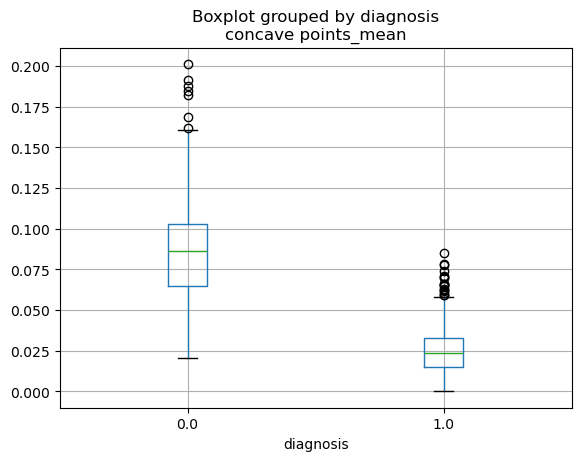

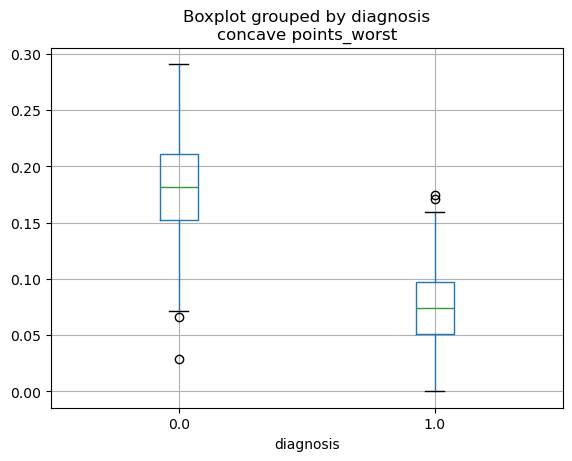

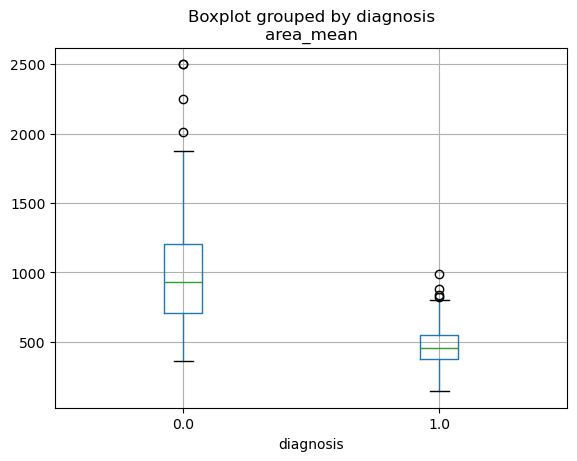

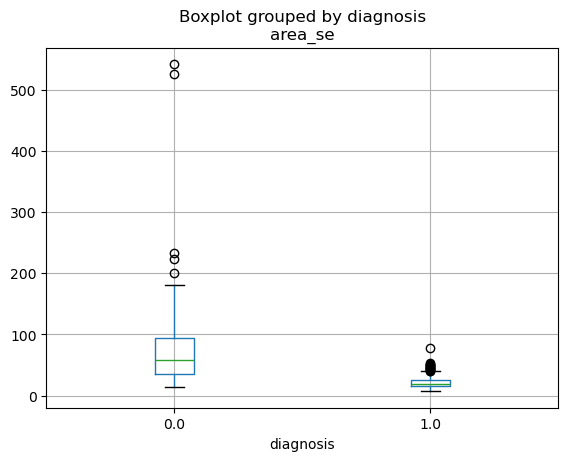

In [ ]:
# Используя boxplots и группировку по целевой переменной, попробуйте предположить,
# по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.
# Посмотрим какие еще признаки кроме 'concave points_mean' наиболее информативны
d.boxplot(column=['concave points_mean'], by='diagnosis')
d.boxplot(column=['concave points_worst'], by='diagnosis')
d.boxplot(column=['area_mean'], by='diagnosis')
d.boxplot(column=['area_se'], by='diagnosis')


In [ ]:
# Разбейте данные на train-test, отложив 30% выборки для тестирования.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d, d.diagnosis, test_size=0.30)

In [ ]:
# Приведите все непрерывные переменные к одному масштабу при помощи стандартизации.
# Кратко поясните, почему стандартизация здесь нужна.
# Нужна чтобы признаки имели единый масштаб.
# Иначе модель будет нестабильна, какие-то признаки будут влиять на результат заметно сильнее чем другие.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Постройте модель kNN «из коробки» без настройки параметров.
# Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score),
# постройте ROC-кривую и посчитайте площадь под ней.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def cross_validate(neighbors, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors = neighbors)
    # потренируемся
    knn.fit(X_train, y_train)
    # проверимся
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    return (accuracy, precision, recall, f1)

tup = cross_validate(1, X_train, y_train, X_test, y_test)

print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        tup[0], tup[1], tup[2], tup[3]))
# уже неплохо

Accuracy:  0.924
Precision: 0.954
Recall:    0.929
F1-score:  0.941


In [ ]:
# Теперь проведите настройку параметра числа соседей на кросс-валидации.
# Снова оцените результаты, стало ли лучше? :)
for neighbours in range(1, 10):
    # shuffle
    X_train, X_test, y_train, y_test = train_test_split(d, d.diagnosis, test_size=0.30)
    # is it getting better?
    tup = cross_validate(neighbours, X_train, y_train, X_test, y_test)
    print("neighbours = {}\nAccuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}\n".format(
        neighbours, tup[0], tup[1], tup[2], tup[3]))
# несколько раз прогнал от 1 до 10. Результаты нестабильны и нельзя сказать что увеличение neighbours
# улучшает модель.

neighbours = 1
Accuracy:  0.918
Precision: 0.964
Recall:    0.914
F1-score:  0.938

neighbours = 2
Accuracy:  0.918
Precision: 0.906
Recall:    0.946
F1-score:  0.926

neighbours = 3
Accuracy:  0.912
Precision: 0.941
Recall:    0.914
F1-score:  0.928

neighbours = 4
Accuracy:  0.895
Precision: 0.949
Recall:    0.877
F1-score:  0.912

neighbours = 5
Accuracy:  0.942
Precision: 0.973
Recall:    0.940
F1-score:  0.956

neighbours = 6
Accuracy:  0.918
Precision: 0.936
Recall:    0.936
F1-score:  0.936

neighbours = 7
Accuracy:  0.924
Precision: 0.927
Recall:    0.953
F1-score:  0.940

neighbours = 8
Accuracy:  0.942
Precision: 0.964
Recall:    0.946
F1-score:  0.955

neighbours = 9
Accuracy:  0.912
Precision: 1.000
Recall:    0.881
F1-score:  0.937



In [ ]:
# все таки интуиция подсказывает что
# самая простая нейронка даст результат близкий к 100%. Пробую.
import tensorflow as tf
from tensorflow.keras import layers
# same 30% for test
X_train, X_test, y_train, y_test = train_test_split(d, d.diagnosis, test_size=0.30)
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
print(X_train_np.shape)
'''
tf_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
tf_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())
tf_model.fit(X_train_np, y_train_np, epochs=10)
'''
